In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file="/content/drive/MyDrive/My_works/DATASCIENCE /datasetoftweets.zip"

In [ ]:
df=pd.read_csv(file)

In [ ]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,MARINATED IN GATER TEARS,religion
freq,2,7998


In [ ]:
display(df.isnull().sum())

,0
tweet_text,0
cyberbullying_type,0


In [ ]:
cyberbullying_counts = df.groupby('cyberbullying_type')
display(cyberbullying_counts.describe())

tweet_text         \
                         count unique   
cyberbullying_type                      
age                       7992   7992   
ethnicity                 7961   7959   
gender                    7973   7948   
not_cyberbullying         7945   7937   
other_cyberbullying       7823   7823   
religion                  7998   7997   

                                                                             
                                                                   top freq  
cyberbullying_type                                                           
age                  Everyone tryin to be a “cute alt girl” like th...    1  
ethnicity            Racism won't stop as long as u stil select ur ...    2  
gender               @thisonesakillaa: In my opinion? All jokes are...    2  
not_cyberbullying    @Ima_TV_Junkie: What the hell were Annie and L...    2  
other_cyberbullying  @Bazmati2020 @sofs_mom I think poor @Annjj is ...    1  
religion             A Pakistani court has sentenced 86 members of ...    2

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


--- Cyberbullying Type Counts ---
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


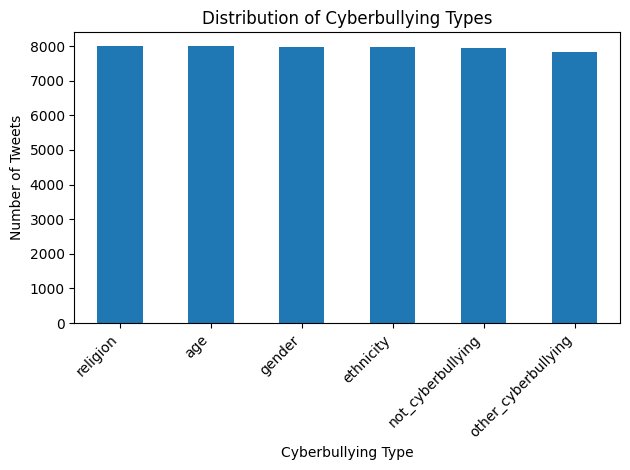

In [ ]:

class_counts = df['cyberbullying_type'].value_counts()

# Print the results
print("--- Cyberbullying Type Counts ---")
print(class_counts)

class_counts.plot(kind='bar')
plt.title('Distribution of Cyberbullying Types')
plt.ylabel('Number of Tweets')
plt.xlabel('Cyberbullying Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df=df.drop_duplicates()

--- Cyberbullying Type Counts ---
cyberbullying_type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64


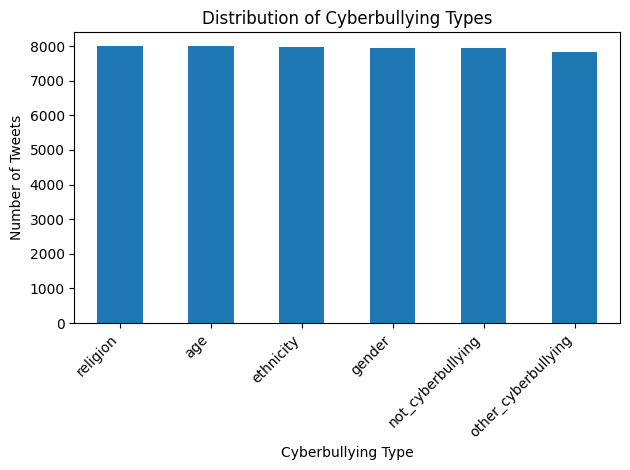

In [ ]:

class_counts = df['cyberbullying_type'].value_counts()

# Print the results
print("--- Cyberbullying Type Counts ---")
print(class_counts)

class_counts.plot(kind='bar')
plt.title('Distribution of Cyberbullying Types')
plt.ylabel('Number of Tweets')
plt.xlabel('Cyberbullying Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
new_columns=["tweet","type"]

In [ ]:
df.columns=new_columns

In [ ]:
df.head()

,tweet,type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


###DATA PROCESSSING

In [ ]:
#conevrting all to lower cases by lamda

In [ ]:
df['tweet']=df['tweet'].apply(lambda x : x.lower())
#done

/tmp/ipython-input-3929632926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet']=df['tweet'].apply(lambda x : x.lower())


In [ ]:
#Remove Noise Specific to Tweets

In [ ]:
import re

def remove_tweet_noise(text):
    # 1. Remove URLs/Links: Search for 'http' or 'www' and replace with a space.
    text = re.sub(r'http\S+|www\S+', ' ', text)

    # 2. Remove Mentions (@username): Search for '@' followed by any word characters.
    text = re.sub(r'@\w+', ' ', text)

    # 3. Remove most Punctuation and Numbers: Keep only letters and spaces.
    #    (Note: This removes the '#' but keeps the hashtag text from your earlier cleaning)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 4. Remove extra whitespace created by the replacements
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Apply the function to your 'tweet' column
df['tweet'] = df['tweet'].apply(remove_tweet_noise)

print("Tweet noise removal applied successfully!")
print(df.head(15))

Tweet noise removal applied successfully!
                                                tweet               type
0   in other words katandandre your food was crapi...  not_cyberbullying
1   why is aussietv so white mkr theblock imaceleb...  not_cyberbullying
2          a classy whore or more red velvet cupcakes  not_cyberbullying
3   meh p thanks for the heads up but not too conc...  not_cyberbullying
4   this is an isis account pretending to be a kur...  not_cyberbullying
5   yes the test of god is that good or bad or ind...  not_cyberbullying
6   itu sekolah ya bukan tempat bully ga jauh kaya...  not_cyberbullying
7   karma i hope it bites kat on the butt she is j...  not_cyberbullying
8                     everything but mostly my priest  not_cyberbullying
9   rebecca black drops out of school due to bullying  not_cyberbullying
10                                                     not_cyberbullying
11                            the bully flushes on kd  not_cyberbullying
12       

/tmp/ipython-input-3710931455.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(remove_tweet_noise)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK packages (run only once)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize Lemmatizer and Stop Words set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def stop_word_and_lemma(text):
    # 1. Tokenize (split text into individual words)
    words = text.split()

    # 2. Remove Stop Words
    words = [word for word in words if word not in stop_words]

    # 3. Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    # 4. Rejoin words into a cleaned string
    return " ".join(words)

# Apply the function to your cleaned tweet column
df['tweet_cleaned'] = df['tweet'].apply(stop_word_and_lemma)

print("Stop word removal and Lemmatization applied successfully.")
print("\nBefore vs. After Cleaning Sample:")
# Display the original tweet and the new cleaned tweet
df[['tweet', 'tweet_cleaned','type']].head(30)

Stop word removal and Lemmatization applied successfully.

Before vs. After Cleaning Sample:


/tmp/ipython-input-4106546755.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_cleaned'] = df['tweet'].apply(stop_word_and_lemma)


,tweet,tweet_cleaned,type
0,in other words katandandre your food was crapi...,word katandandre food crapilicious mkr,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,a classy whore or more red velvet cupcakes,classy whore red velvet cupcake,not_cyberbullying
3,meh p thanks for the heads up but not too conc...,meh p thanks head concerned another angry dude...,not_cyberbullying
4,this is an isis account pretending to be a kur...,isi account pretending kurdish account like is...,not_cyberbullying
5,yes the test of god is that good or bad or ind...,yes test god good bad indifferent weird whatev...,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya...,itu sekolah ya bukan tempat bully ga jauh kaya...,not_cyberbullying
7,karma i hope it bites kat on the butt she is j...,karma hope bite kat butt nasty mkr,not_cyberbullying
8,everything but mostly my priest,everything mostly priest,not_cyberbullying
9,rebecca black drops out of school due to bullying,rebecca black drop school due bullying,not_cyberbullying


In [ ]:
dfnew=df.dropna()
df=dfnew

In [ ]:
df.shape

(47656, 3)

In [ ]:
# Create the binary target column 'is_bullying'
# 1. Replace the 'not_cyberbullying' label with 0.
# 2. Replace all other labels (the bullying types) with 1.

df['is_bullying'] = df['type'].apply(lambda x: 0 if x == 'not_cyberbullying' else 1)
TARGET_COLUMN = 'is_bullying'

print("Binary target column 'is_bullying' created.")
print("Check the first five values of the new column:")
print(df[[TARGET_COLUMN, 'type']].head())

Binary target column 'is_bullying' created.
Check the first five values of the new column:
   is_bullying               type
0            0  not_cyberbullying
1            0  not_cyberbullying
2            0  not_cyberbullying
3            0  not_cyberbullying
4            0  not_cyberbullying


In [ ]:
df.head()
print(df['type'].value_counts())
print(df['is_bullying'].value_counts())

type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64
is_bullying
1    39719
0     7937
Name: count, dtype: int64


In [ ]:
cyberbullying_counts = df.groupby('type')
print(cyberbullying_counts.size())

type
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
religion               7997
dtype: int64


####NAIVE BAYES (BINARY)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score



In [ ]:
X = df['tweet']
y = df['is_bullying']#only binary yes or no #ok?

# Split data (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData Split: Training={len(X_train)}, Testing={len(X_test)}")


Data Split: Training=38124, Testing=9532


In [ ]:
# --- Step 1: Feature Extraction (TF-IDF) ---
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
# Using max_features to limit size and ngram_range for 1-word and 2-word phrases

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(f"TF-IDF Vectorization Complete. Feature Count: {X_train_vec.shape[1]}")

TF-IDF Vectorization Complete. Feature Count: 10000


In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# --- Step 3: Evaluation ---
y_pred = naive_bayes.predict(X_test_vec)

In [ ]:
print("\nDetailed Classification Report:")
print("#results")
print(classification_report(y_test, y_pred, target_names=['Non-bullying', 'Bullying']))
#f1 score is harmonic mean of Precision and reacall


Detailed Classification Report:
#results
              precision    recall  f1-score   support

Non-bullying       0.77      0.22      0.34      1588
    Bullying       0.86      0.99      0.92      7944

    accuracy                           0.86      9532
   macro avg       0.82      0.60      0.63      9532
weighted avg       0.85      0.86      0.82      9532



In [ ]:
#Non bullying recall is so low means actually non bullying cases are mostly classified as bullyig

###CONCLUSION: IN NAIVE Bayes Model is biased towards majory class is_bullying=1 as evidnet from macro f1


###MEthod 2:BiLSTM approach

In [ ]:
# 1. Use df.factorize() to generate the numerical labels and the unique class names (the factorized array)
# This method automatically assigns an integer to each unique string it finds in the column.

# 'labels' is the new numerical column (y_train/y_test target)
# 'unique_classes' is the list of original string names corresponding to the numbers (e.g., [0: 'religion', 1: 'age', ...])
df['target_id'], unique_classes = pd.factorize(df['type'])
print(type(unique_classes))
# 2. Create a reference dictionary for mapping
label_to_id = {label: i for i, label in enumerate(unique_classes)}
id_to_label = {i: label for i, label in enumerate(unique_classes)}

# print("Label Encoding Complete.")
# print("-" * 300)
# print("Total number of classes found:", len(unique_classes))
# print("Numerical ID to Original Label Mapping:")

# Display the resulting map
# for id_val, label in id_to_label.items():
#     print(f"ID {id_val}: {label}")
# for label, id in label_to_id.items():
#     print(f"ID {label}: {id}")


TARGET_COLUMN = 'target_id'

<class 'pandas.core.indexes.base.Index'>


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Parameters based on typical NLP projects
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 50

# Assuming these columns/variables are ready from your previous steps:
# df['tweet_cleaned'] (your cleaned text)
# df['target_id'] (your multiclass labels, 0 to 5)

X = df['tweet_cleaned']
y = df['target_id']

# Split data into training and testing sets (80/20 split)
X_train_text, X_test_text, y_train_id, y_test_id = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Data Split: Training Samples={len(X_train_text)}, Testing Samples={len(X_test_text)}")

Data Split: Training Samples=38124, Testing Samples=9532


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer, setting a maximum vocabulary size
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<unk>")

# FIT: The tokenizer MUST only learn words from the training data (X_train_text)
tokenizer.fit_on_texts(X_train_text)

# CONVERT: Transform both sets into sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train_text)
X_test_sequences = tokenizer.texts_to_sequences(X_test_text)

print(f"Tokenization Complete. Actual Vocabulary Size: {len(tokenizer.word_index)}")
print(f"Example original tweet: {X_train_text.iloc[0:5]}")
print(f"Example integer sequence: {X_train_sequences[0:5]}",end="\n")

Tokenization Complete. Actual Vocabulary Size: 33142
Example original tweet: 3611          next round kat cook andre get next round mkr
36783    horrible bitchy girl high school friending peo...
28086                                           hahaha yam
40906    smart go school high tf dumb fuck wonder black...
39840    bj rk fair nobody tell anything made important...
Name: tweet_cleaned, dtype: object
Example integer sequence: [[241, 563, 144, 656, 334, 21, 241, 563, 25], [664, 2163, 8, 11, 2, 15661, 13, 14, 422, 580, 881, 7786, 191], [868, 11284], [738, 35, 2, 11, 741, 10, 3, 517, 22, 21, 969, 75, 5, 126], [11285, 9124, 956, 554, 104, 66, 84, 760, 3371, 3096, 96, 405, 585, 22, 485, 20, 1143, 1883, 555, 838, 70, 4734, 670]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad or truncate sequences to the fixed length
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print(f"Padded Training Data Shape: {X_train_padded.shape}")
print(f"Padded Testing Data Shape: {X_test_padded.shape}")

Padded Training Data Shape: (38124, 50)
Padded Testing Data Shape: (9532, 50)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Determine the number of unique classes (e.g., 6)
num_classes = df['target_id'].nunique()

# Convert the integer labels (y_train_id, y_test_id) to One-Hot Encoded vectors
y_train_cat = to_categorical(y_train_id, num_classes=num_classes)
y_test_cat = to_categorical(y_test_id, num_classes=num_classes)

print(f"One-Hot Encoded Training Label Shape: {y_train_cat.shape}")
print(f"First 5 encoded labels: \n{y_train_cat[:5]}")

One-Hot Encoded Training Label Shape: (38124, 6)
First 5 encoded labels: 
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- Model Hyperparameters ---
EMBEDDING_DIM = 128
LSTM_UNITS = 64
DROPOUT_RATE = 0.5

# --- Build the Model ---
model_bilstm = Sequential()

# Layer 1: Embedding Layer (The word-to-vector lookup table)
# input_dim is the total size of our vocabulary
model_bilstm.add(Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_SEQUENCE_LENGTH
))

# Layer 2: Bi-LSTM (Captures context by reading the sequence forward and backward)
model_bilstm.add(Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)))

# Layer 3: Regularization
model_bilstm.add(Dropout(DROPOUT_RATE))

# Layer 4: Output Layer (Predicts probability over the 6 classes)
model_bilstm.add(Dense(num_classes, activation='softmax'))

# --- Compile the Model ---
# Use 'categorical_crossentropy' for multi-class, 'Adam' optimizer
model_bilstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Bi-LSTM Model Architecture Defined and Compiled.")
model_bilstm.summary()

Bi-LSTM Model Architecture Defined and Compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Training Parameters ---
EPOCHS = 10
BATCH_SIZE = 64

print(f"Starting Bi-LSTM Training for {EPOCHS} epochs...")

history_bilstm = model_bilstm.fit(
    X_train_padded,
    y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_padded, y_test_cat)
)

print("\nBi-LSTM Training Complete.")

Starting Bi-LSTM Training for 10 epochs...
Epoch 1/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 143ms/step - accuracy: 0.6242 - loss: 0.9151 - val_accuracy: 0.8253 - val_loss: 0.4152
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 141ms/step - accuracy: 0.8615 - loss: 0.3528 - val_accuracy: 0.8244 - val_loss: 0.4150
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 143ms/step - accuracy: 0.8963 - loss: 0.2678 - val_accuracy: 0.8255 - val_loss: 0.4458
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 142ms/step - accuracy: 0.9145 - loss: 0.2162 - val_accuracy: 0.8132 - val_loss: 0.4960
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 141s 141ms/step - accuracy: 0.9222 - loss: 0.1861 - val_accuracy: 0.8114 - val_loss: 0.5478
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 142s 141ms/step - accuracy: 0.9281 - loss: 0.1674 - val_accuracy: 0.8075 - val_loss: 0.6169
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 86s 144ms/step - accuracy: 0.9367 - loss: 0.1495 - val_accuracy: 0.8068 - val_loss: 0.6531
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━

In [ ]:
import pickle
import os
from tensorflow.keras.models import save_model

# --- 1. Save Training History (Plotting data) ---
history_filepath = 'bilstm_multiclass_history.pkl'

with open(history_filepath, 'wb') as file:
    pickle.dump(history_bilstm.history, file)

print(f"Training history saved to {history_filepath}")

# --- 2. Save the Final Model Weights ---
# Note: Since ModelCheckpoint wasn't used, this saves the model from the FINAL epoch (Epoch 10)
model_filepath = 'bilstm_multiclass_final_model.h5'
model_bilstm.save(model_filepath)

print(f"Final model saved to {model_filepath}")

Training history saved to bilstm_multiclass_history.pkl
Final model saved to bilstm_multiclass_final_model.h5


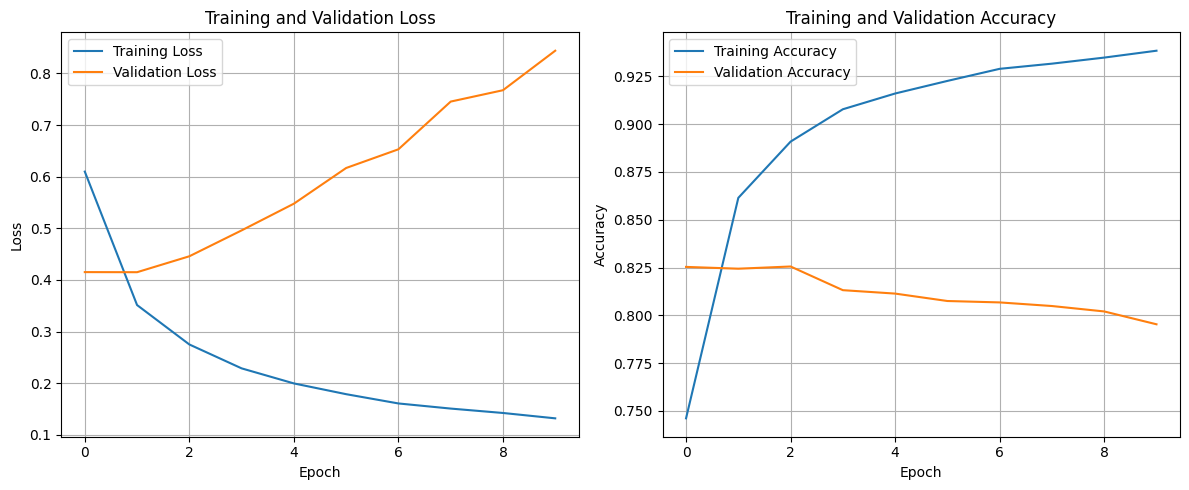

Final Validation Accuracy: 0.7953


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract the history dictionary from the saved object
history_dict = history_bilstm.history

# --- Plot 1: Loss ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Plot 2: Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Quick print of final performance for reference
val_accuracy = history_dict['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_test_padded and y_test_cat are ready
# 1. Make predictions (raw probabilities for 6 classes)
y_pred_probs = model_bilstm.predict(X_test_padded)

# 2. Convert probabilities to class indices (e.g., [0.1, 0.9, 0.0] -> 1)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 3. Convert true labels back from one-hot to class indices
y_true_classes = np.argmax(y_test_cat, axis=1)

# 4. Generate the classification report
# IMPORTANT: Use the unique_classes list saved by pd.factorize() as target_names
# This ensures classes 0, 1, 2, etc. are labeled correctly.
print("\n--- STAGE 2: Bi-LSTM Multiclass Classification Report ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_classes))

298/298 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step

--- STAGE 2: Bi-LSTM Multiclass Classification Report ---
                     precision    recall  f1-score   support

  not_cyberbullying       0.53      0.51      0.52      1587
             gender       0.86      0.80      0.83      1590
           religion       0.93      0.94      0.94      1600
other_cyberbullying       0.55      0.57      0.56      1565
                age       0.95      0.97      0.96      1598
          ethnicity       0.93      0.98      0.95      1592

           accuracy                           0.80      9532
          macro avg       0.79      0.79      0.79      9532
       weighted avg       0.79      0.80      0.79      9532



In [ ]:
###

###chnaging Hyperparameters and tarining again for better accuarcy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- Adjusted Hyperparameters ---
EMBEDDING_DIM = 128
LSTM_UNITS_V2 = 48      # Reduced capacity
DROPOUT_RATE_V2 = 0.6   # Increased dropout for regularization
num_classes = y.nunique() # Assuming y (target_id) is still available
MAX_SEQUENCE_LENGTH = 50 # Must match previous padding/embedding setup

# --- Build Bi-LSTM V2 Model ---
model_bilstm_v2 = Sequential()

# Layer 1: Embedding Layer (Input from Tokenizer)
model_bilstm_v2.add(Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_SEQUENCE_LENGTH
))

# Layer 2: Bi-LSTM (with reduced units)
model_bilstm_v2.add(Bidirectional(LSTM(LSTM_UNITS_V2, return_sequences=False)))

# Layer 3: Regularization (with increased dropout)
model_bilstm_v2.add(Dropout(DROPOUT_RATE_V2))

# Layer 4: Output Classifier
model_bilstm_v2.add(Dense(num_classes, activation='softmax'))

# --- Compile the Model ---
model_bilstm_v2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Bi-LSTM V2 Model Architecture Defined with Adjusted Parameters.")
model_bilstm_v2.summary()

Bi-LSTM V2 Model Architecture Defined with Adjusted Parameters.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# --- Define Callbacks ---
# New unique file path to save the best model weights
MODEL_FILE_PATH_V2 = 'best_bilstm_multiclass_v2.weights.h5'

checkpoint_v2 = ModelCheckpoint(
    MODEL_FILE_PATH_V2,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping_v2 = EarlyStopping(
    monitor='val_accuracy',
    patience=4,  # Increased patience slightly for stability
    verbose=1,
    mode='max',
    restore_best_weights=True
)

callbacks_list_v2 = [checkpoint_v2, early_stopping_v2]

# --- Train Model V2 ---
EPOCHS_V2 = 15
BATCH_SIZE = 64

print(f"Starting Bi-LSTM V2 Training for up to {EPOCHS_V2} epochs with Early Stopping...")

history_bilstm_v2 = model_bilstm_v2.fit(
    X_train_padded,
    y_train_cat,
    epochs=EPOCHS_V2,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_padded, y_test_cat),
    callbacks=callbacks_list_v2
)

print("\nBi-LSTM V2 Training Complete.")

Starting Bi-LSTM V2 Training for up to 15 epochs with Early Stopping...
Epoch 1/15
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6141 - loss: 0.9726
Epoch 1: val_accuracy improved from -inf to 0.81756, saving model to best_bilstm_multiclass_v2.weights.h5


596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.6143 - loss: 0.9720 - val_accuracy: 0.8176 - val_loss: 0.4349
Epoch 2/15
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8402 - loss: 0.3935
Epoch 2: val_accuracy improved from 0.81756 to 0.83214, saving model to best_bilstm_multiclass_v2.weights.h5


596/596 ━━━━━━━━━━━━━━━━━━━━ 74s 124ms/step - accuracy: 0.8402 - loss: 0.3935 - val_accuracy: 0.8321 - val_loss: 0.4224
Epoch 3/15
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8894 - loss: 0.2909
Epoch 3: val_accuracy did not improve from 0.83214
596/596 ━━━━━━━━━━━━━━━━━━━━ 76s 127ms/step - accuracy: 0.8894 - loss: 0.2909 - val_accuracy: 0.8256 - val_loss: 0.4356
Epoch 4/15
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9061 - loss: 0.2390
Epoch 4: val_accuracy did not improve from 0.83214
596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 131ms/step - accuracy: 0.9061 - loss: 0.2390 - val_accuracy: 0.8193 - val_loss: 0.4765
Epoch 5/15
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9207 - loss: 0.2034
Epoch 5: val_accuracy did not improve from 0.83214
596/596 ━━━━━━━━━━━━━━━━━━━━ 76s 128ms/step - accuracy: 0.9206 - loss: 0.2035 - val_accuracy: 0.8069 - val_loss: 0.5362
Epoch 6/15
596/596 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9214 - loss: 0.1931
Epoch 6: val_ac

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


# Assuming X_test_padded and y_test_cat are ready from earlier steps
# 2. Make predictions (raw probabilities for 6 classes)
y_pred_probs_v2 = model_bilstm_v2.predict(X_test_padded)

# 3. Convert probabilities to class indices (e.g., [0.1, 0.9, 0.0] -> 1)
y_pred_classes_v2 = np.argmax(y_pred_probs_v2, axis=1)

# 4. Convert true labels back from one-hot to class indices
y_true_classes_v2 = np.argmax(y_test_cat, axis=1)

print("\n--- STAGE 2: Bi-LSTM V2 (Regularized) Classification Report ---")
print(classification_report(y_true_classes_v2, y_pred_classes_v2, target_names=unique_classes))

# Save the classification results for later comparison if desired
# np.savez('bilstm_v2_predictions.npz', y_true=y_true_classes_v2, y_pred=y_pred_classes_v2)

298/298 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step

--- STAGE 2: Bi-LSTM V2 (Regularized) Classification Report ---
                     precision    recall  f1-score   support

  not_cyberbullying       0.62      0.53      0.57      1587
             gender       0.91      0.82      0.86      1590
           religion       0.95      0.96      0.96      1600
other_cyberbullying       0.59      0.74      0.66      1565
                age       0.97      0.97      0.97      1598
          ethnicity       0.99      0.97      0.98      1592

           accuracy                           0.83      9532
          macro avg       0.84      0.83      0.83      9532
       weighted avg       0.84      0.83      0.83      9532



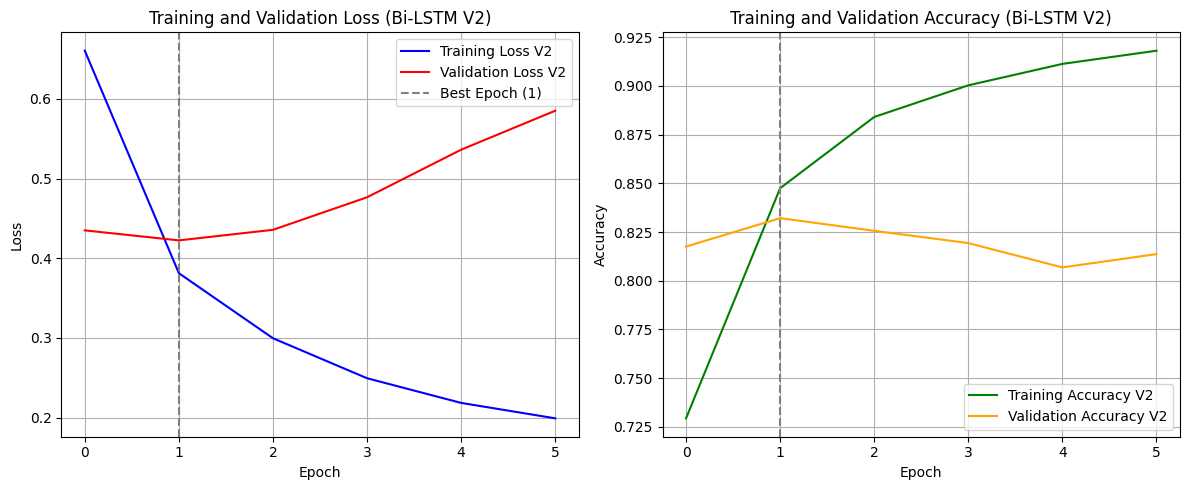

The best model (Macro F1 of 0.83) was saved at Epoch 1 with a Validation Accuracy of 0.8321.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the history dictionary from the V2 training run
history_dict_v2 = history_bilstm_v2.history

# Find the best validation accuracy achieved (where Model Checkpoint saved the weights)
best_val_accuracy = max(history_dict_v2['val_accuracy'])
best_epoch = np.argmax(history_dict_v2['val_accuracy'])

# --- Plot 1: Loss ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict_v2['loss'], label='Training Loss V2', color='blue')
plt.plot(history_dict_v2['val_loss'], label='Validation Loss V2', color='red')
plt.axvline(x=best_epoch, color='gray', linestyle='--', label=f'Best Epoch ({best_epoch})')

plt.title('Training and Validation Loss (Bi-LSTM V2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Plot 2: Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history_dict_v2['accuracy'], label='Training Accuracy V2', color='green')
plt.plot(history_dict_v2['val_accuracy'], label='Validation Accuracy V2', color='orange')
plt.axvline(x=best_epoch, color='gray', linestyle='--')

plt.title('Training and Validation Accuracy (Bi-LSTM V2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"The best model (Macro F1 of 0.83) was saved at Epoch {best_epoch} with a Validation Accuracy of {best_val_accuracy:.4f}.")

###STILL THE MODEL OVERFITS
The reason:The model's peak validation performance occurred in Epoch 1 (or 2), followed by immediate overfitting (Validation Loss rose). This suggests the initial learning rate ($\mathbf{0.001}$) was too high, causing the model's large parameter updates (especially in the Embedding Layer) to overshoot the optimal minima right away. It's unclear if this missed minima was local or global. For stable, precise learning, the ideal strategy is to implement an LR Scheduler to dramatically reduce the learning rate after the first few epochs, allowing the model to slowly and steadily converge to a better, generalized solution.
